## Uso de Decision Trees para mostrar explicação de decisões via regras derivadas dos ramos da DT.

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
file_name = 'data.csv'
data_original = pd.read_csv(file_name)
print(data_original.columns)

Index(['Language', 'Program', 'PowerLimit', 'PKG', 'CPU', 'Time',
       'Temperature', 'Memory'],
      dtype='object')


In [3]:
def plot_relation(atrib,atribs):
    data = data_original.copy()
    data["Label"] = data[atrib].map(lambda x: str(x))
    
    elems = [atribs,'Label'] + atribs
    columns_drop = [c for c in data.columns if c not in elems]
    data.drop(columns_drop,axis=1,inplace=True)

    y = data.Label
    X = data.drop(columns=['Label'])
    print(set(data['Label'].values))
    classes = [elem for elem in set(data['Label'].values)]
    %matplotlib inline
    clf = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.1)
    plt.figure(figsize=(20,16))
    clf = clf.fit(X, y)
    tree.plot_tree(clf,feature_names=atribs,class_names=classes,filled=True, rounded=True)

{'-1', '5'}


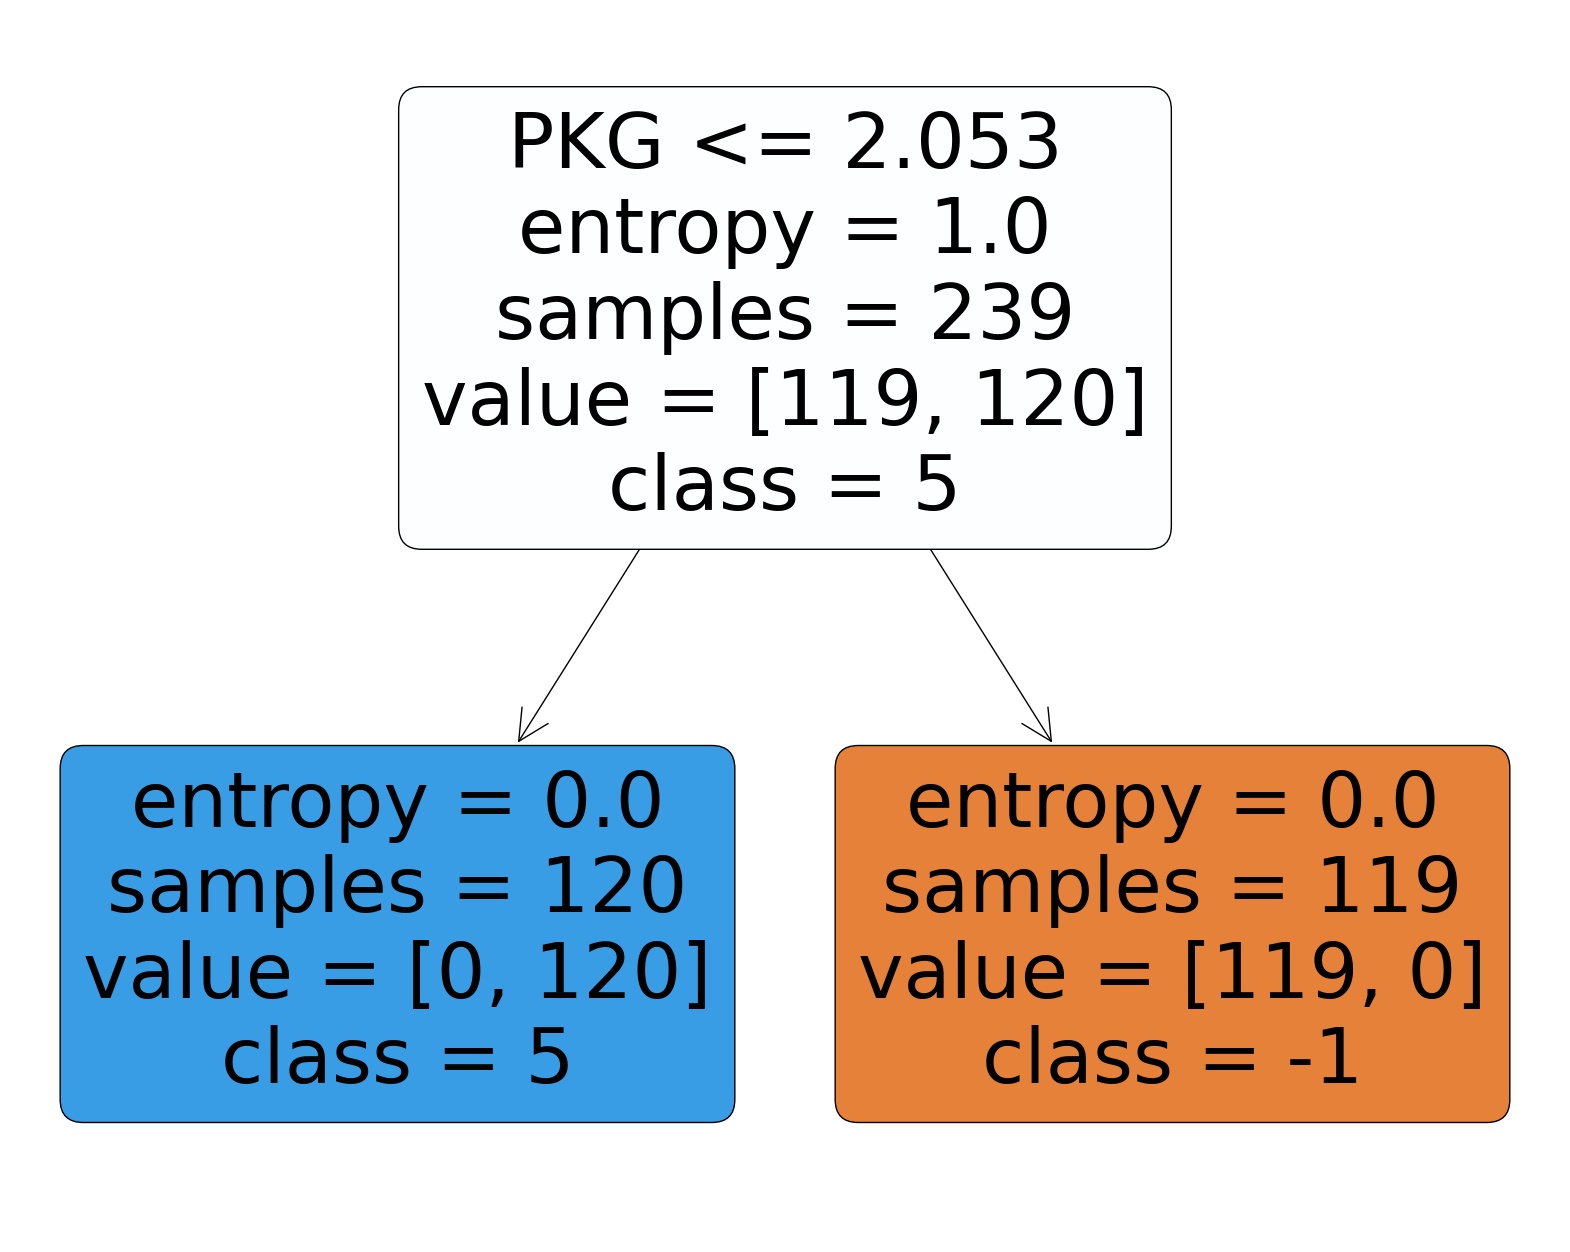

In [4]:
plot_relation('PowerLimit',['PKG'])

### Com isto podemos concluir que o valor do consumo de energia é influenciado pelo PowerCap, sendo que com PowerCap, resulta num menor consumo de energia.

{'-1', '5'}


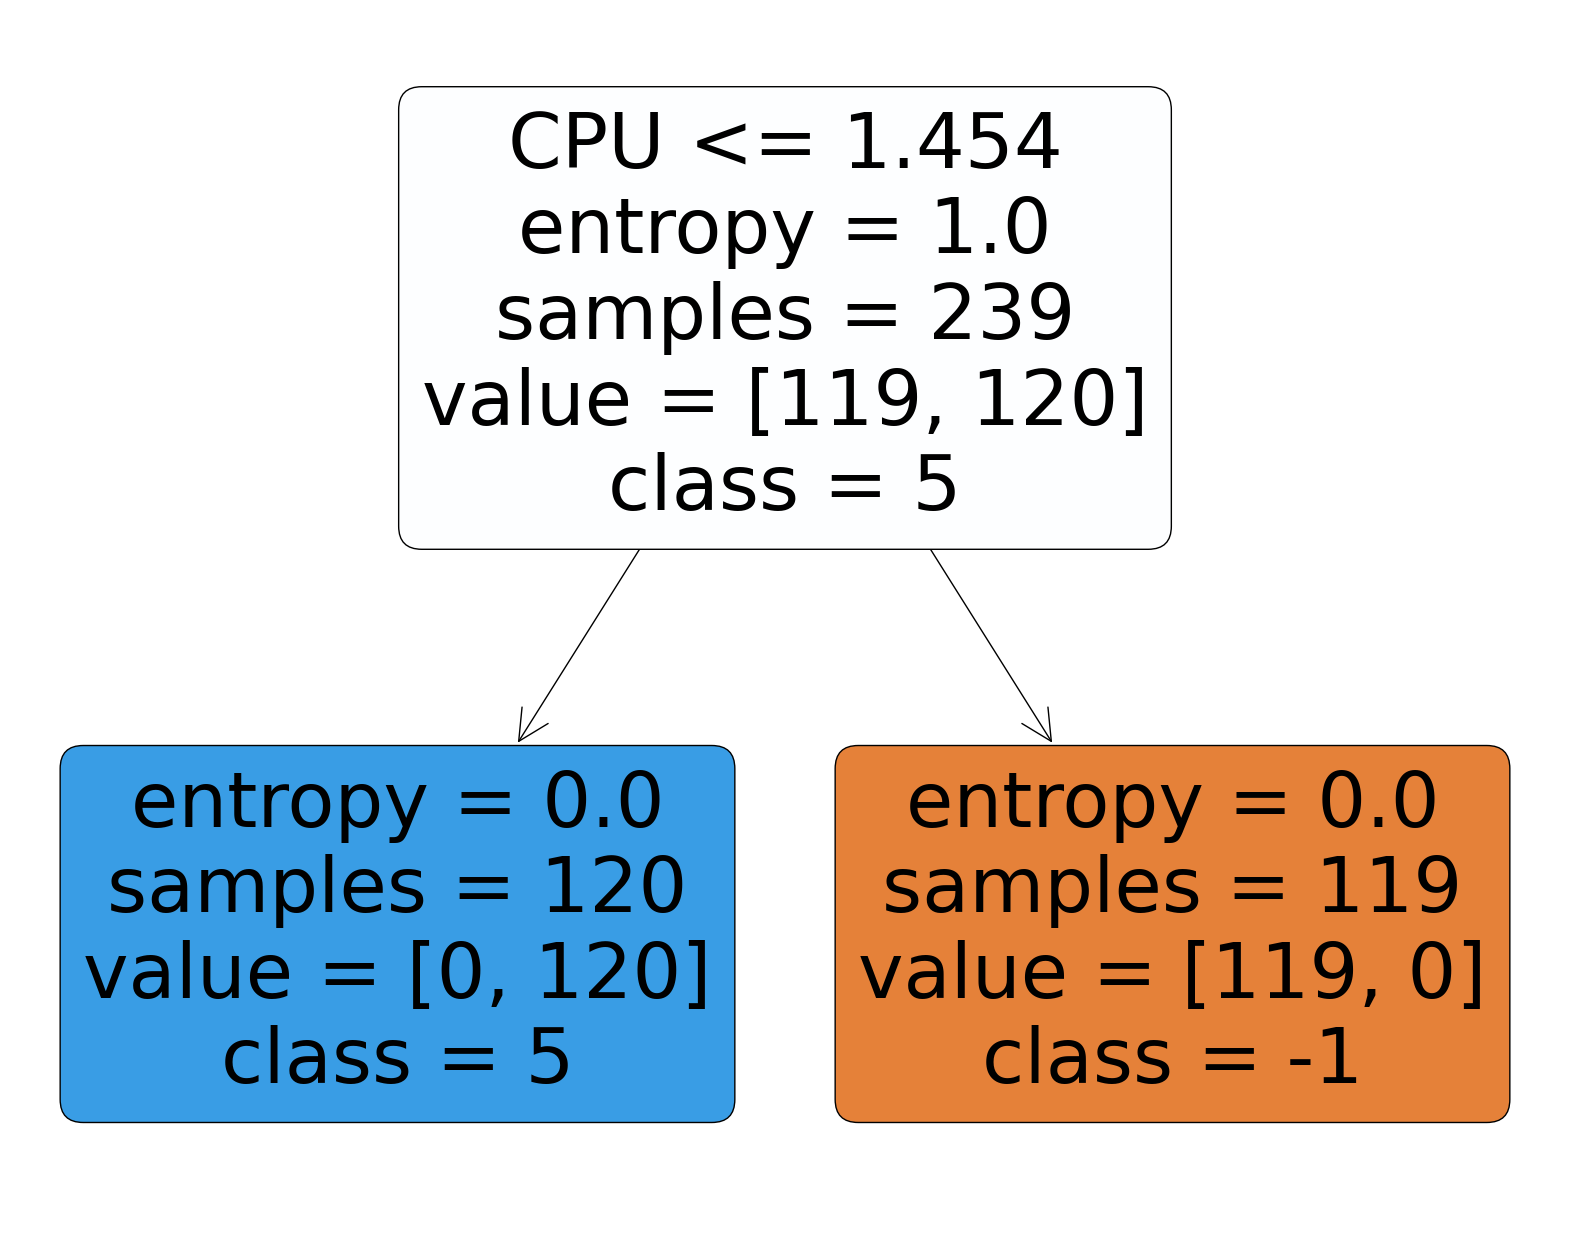

In [5]:
plot_relation('PowerLimit',['CPU'])

### Podemos observar que o mesmo se pode concluir para a energia consumida pelo procesador

{'-1', '5'}


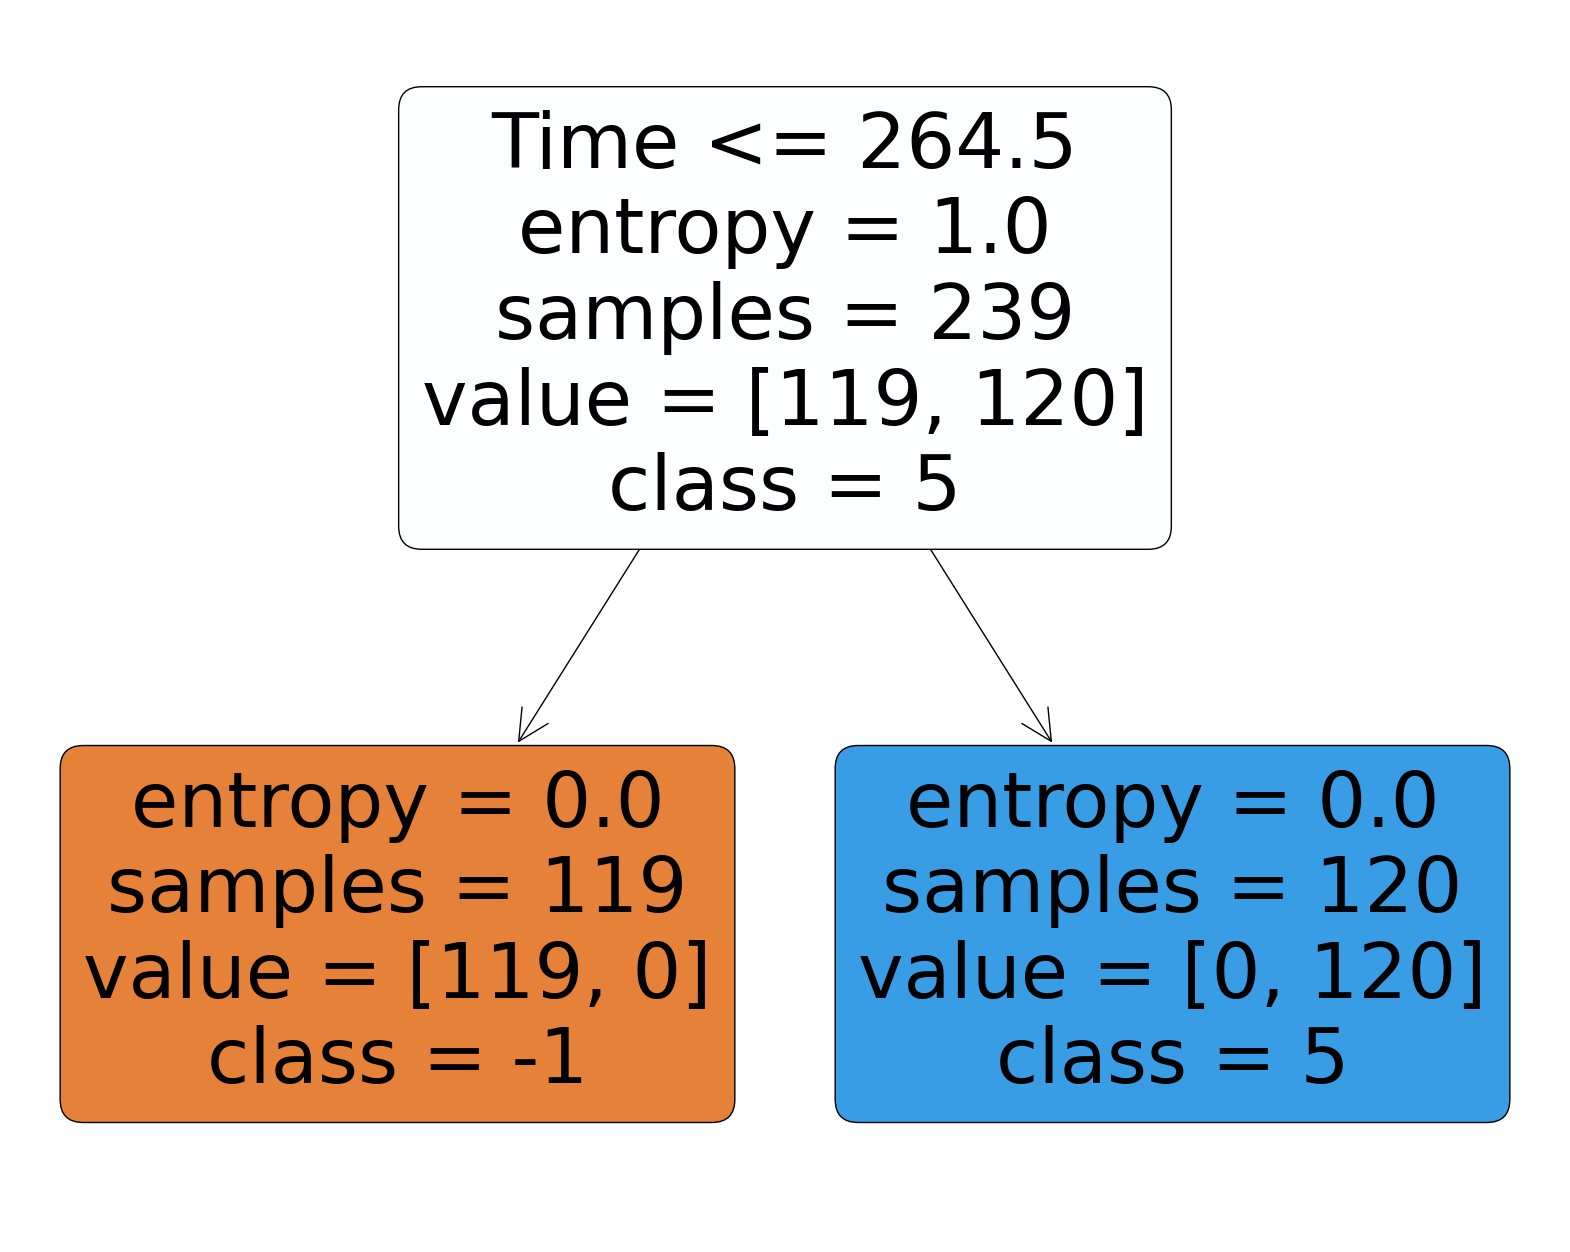

In [6]:
plot_relation('PowerLimit',['Time'])

### Com isto concluimos que quando temos power cap, a benchmark demora mais tempo

{'Python_3.9.18', 'Python_3.11.4', 'Python_3.6.13'}


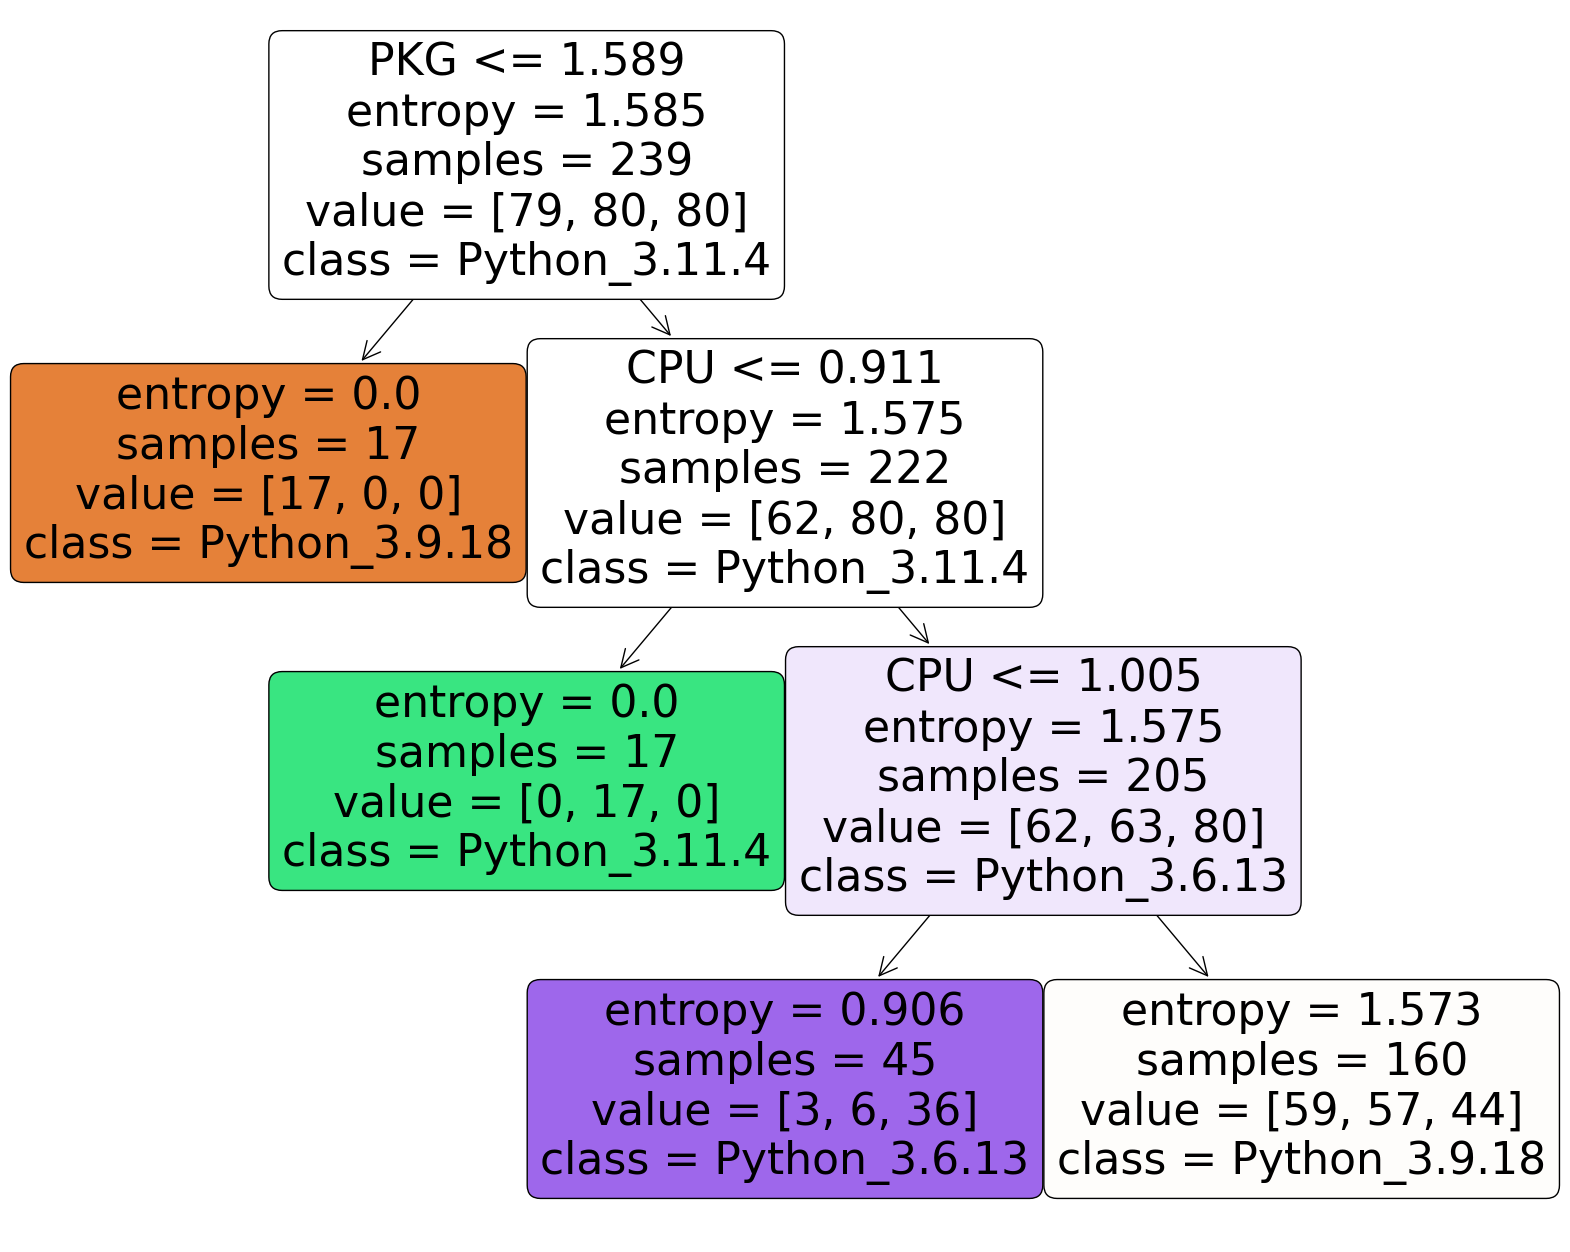

In [7]:
plot_relation('Language',['PKG','CPU'])

### Com estes valores podemos concluir que as diferentes versões do python não estão muito relacionados com o consumo de energia, devido ao facto de que as divisões apresentarem valores bastante próximos

{'Python_3.9.18', 'Python_3.11.4', 'Python_3.6.13'}


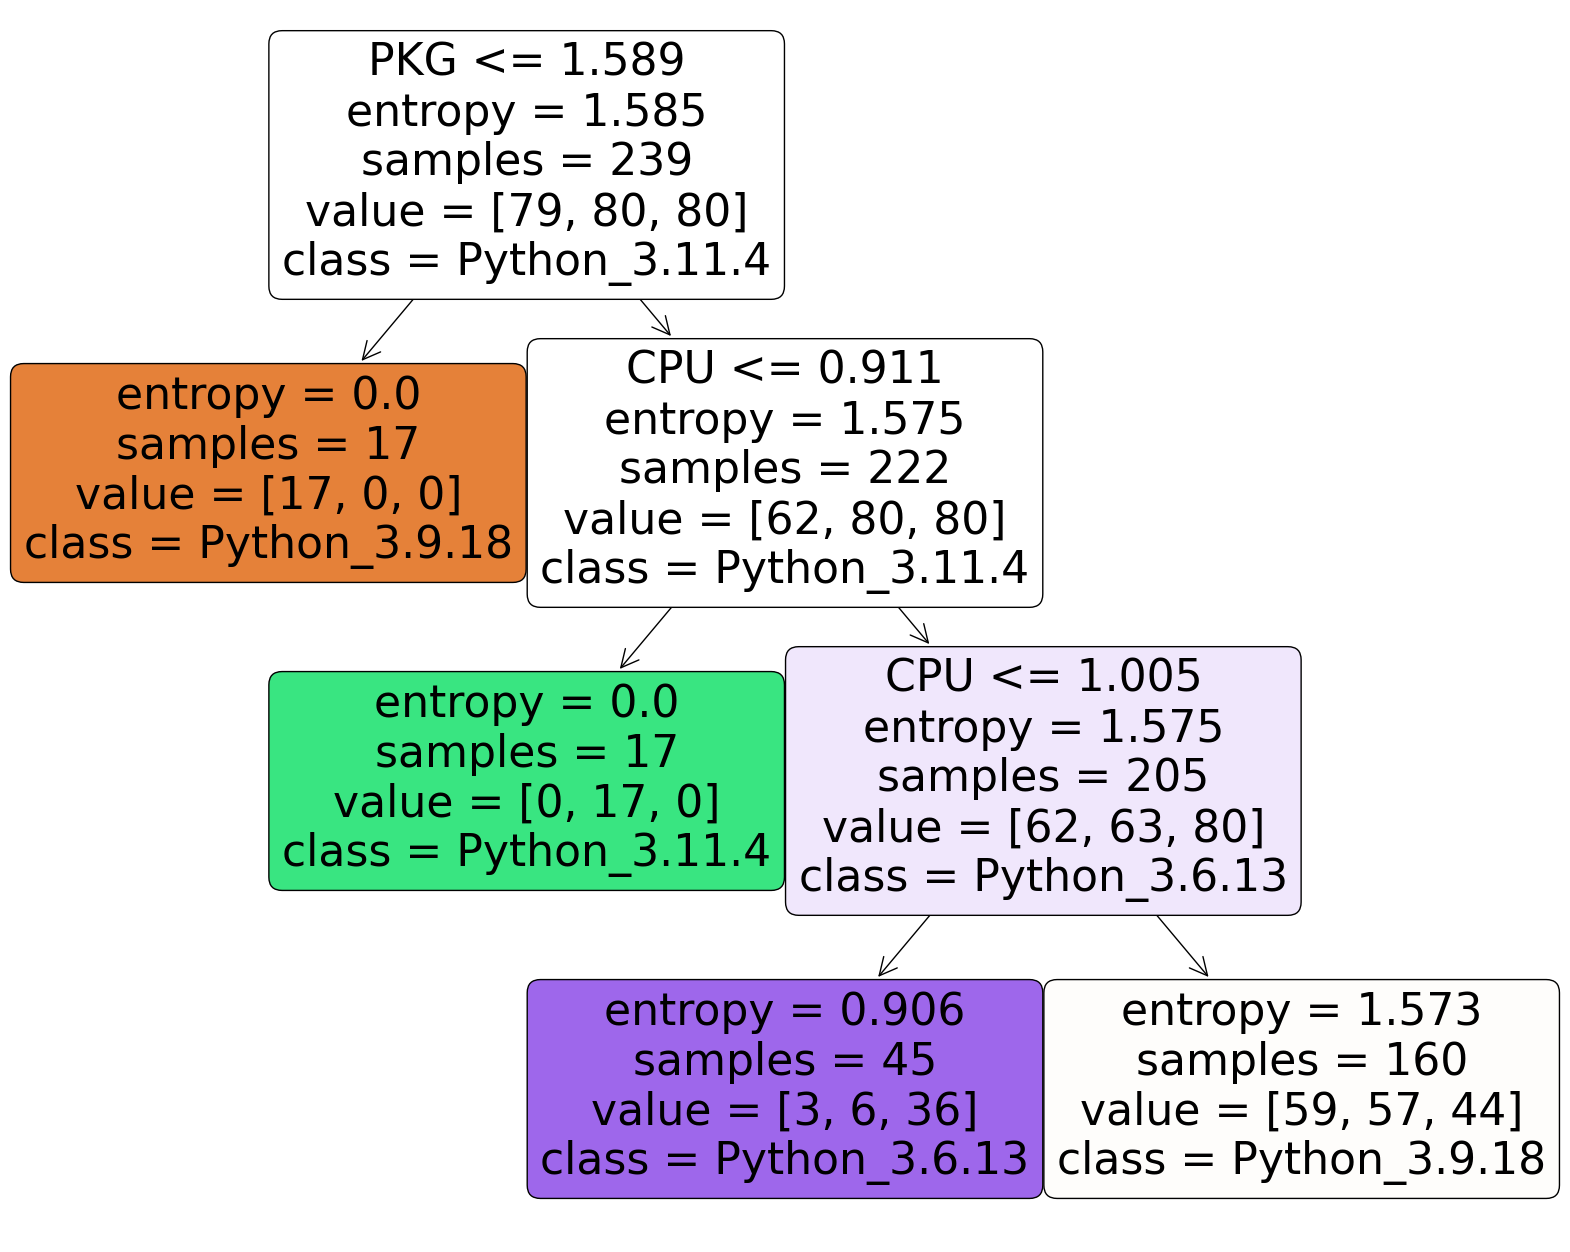

In [8]:
plot_relation('Language',['PKG','CPU', 'Time'])

### Gráfico exatamente igual ao anterior, ao que concluimos que o tempo de execução não está relacionado com o facto de haver uma diferença na versão da linguagem.